In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Loading the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Store the 'Survived' feature in a new variable and remove it from the dataset we will 
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [28]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [29]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


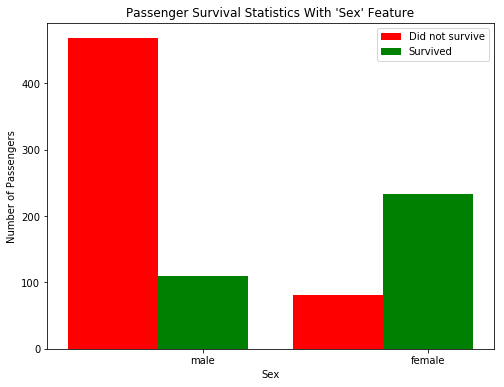

In [30]:
vs.survival_stats(data, outcomes, 'Sex')

In [43]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #As mentioned above we need to check whether survived passenger is Female or not
        if passenger['Sex'] != 'female':
            predictions.append(0)
        else:
            predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [44]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


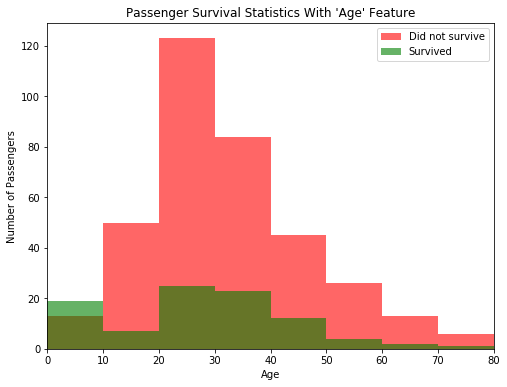

In [45]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [46]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #Predicting passenger survived if they are female and if male and younger than 10
        if passenger['Sex'] == 'female' or (passenger['Sex'] == 'male' and passenger['Age'] < 10):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [47]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


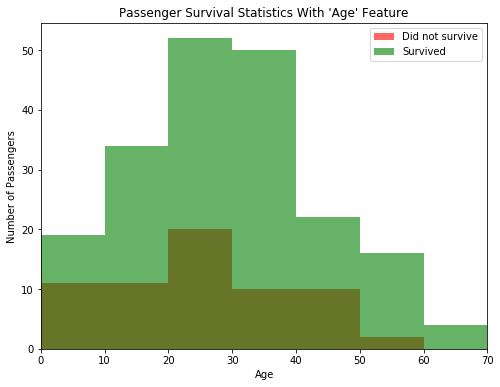

In [160]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'"])

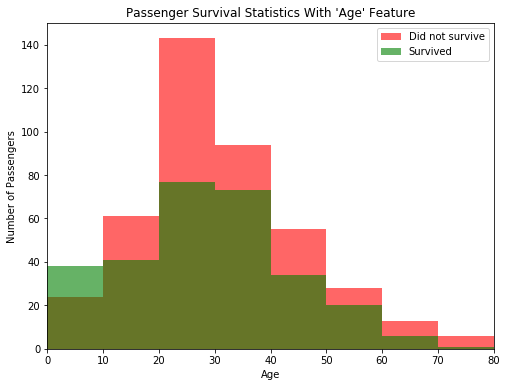

In [161]:
#Let's see what age of people survived most
vs.survival_stats(data, outcomes, 'Age')

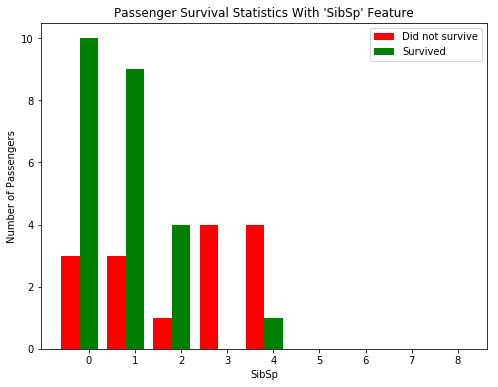

In [190]:
#Let's see the SibSp for females who are under 15
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", "Age < 15"])

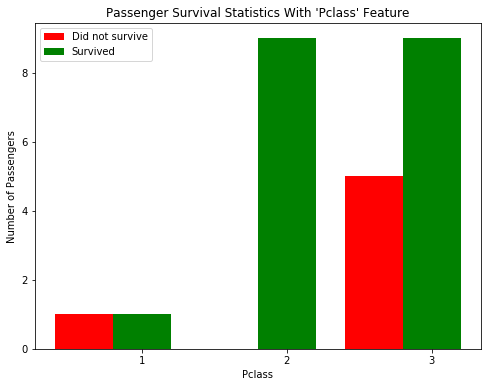

In [191]:
#Let's add another condition whether SibSp is 0 or 1 and check the Pclass.
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'", "Age < 15", "SibSp < 2"])

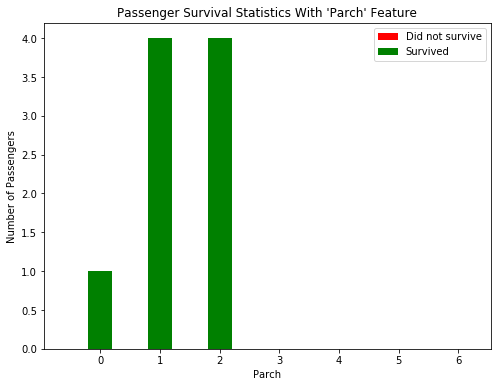

In [192]:
#As we can see in the above graph, female with Pclass=2 survived. Now we will check Parch for Pclass=2.
vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'", "Age < 15", "SibSp < 2", "Pclass == 2"])

In [188]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female' or passenger['Age'] < 15:
            if passenger['SibSp'] < 2:
                if passenger['Pclass'] == 2:
                    if passenger['Parch'] < 3:
                        predictions.append(1)
                    else:
                        predictions.append(1)
                else:
                    predictions.append(1)
            else:
                predictions.append(0)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [189]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.92%.


<b>Answer:</b> 80.92%

<b>Features used:</b>
Sex
Age
Number of siblings or spouses
Class of passenger
Number of parents or children

<b>Most infomative feature:</b> Sex

For the final prediction model, I went to visualize the data, starting from sex and then adding one by one condition like age, SibSp, Pclass, Parch. After the first and second visualization, it was clear that most of the survivors are females and children. Then going through Siblings I found that who has 1 or none siblings are most likely to survived. After that, while analyzing person class I come up with the conclusion that class 2 people are survived the most and lastly, I check if the number of parents or children is less than 3, then they might get survived.

<b>Question 5:</b> Can you think of an example of where supervised learning can be applied?

<b>Hint:</b> Be sure to note the outcome variable to be predicted and at least two features that might be useful for making the predictions.

<b>Answer:</b> Supervised learning can be used in predicting outcome of a cricket match where outcome of match can be predicted from the past performance of the team as well as players.
Features can be:
- World ranking of team
- Average of batsman
- Average of bowler
- one to one statistics of the teams